# Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import copy
import warnings
warnings.filterwarnings("ignore")

# Load data

In [2]:
# load the data and save the original data without changing to avoid miss some records.

original_data = pd.read_csv('auto_mpg_dataset.csv')
df = copy.deepcopy(original_data)
df

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,ford torino,17.0
...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl,27.0
394,4,97.0,52.0,2130.0,24.6,82,2,vw pickup,44.0
395,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage,32.0
396,4,120.0,79.0,2625.0,18.6,82,1,ford ranger,28.0


# Information about data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    float64
 3   weight        398 non-null    float64
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   car_name      398 non-null    object 
 8   mpg           398 non-null    float64
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [4]:
df.describe(include='all')

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398,398.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ford pinto,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN
mean,5.454774,193.425879,-1404.643216,2970.424623,15.568090,76.010050,1.572864,NaN,23.514573
std,1.701004,104.269838,12213.424763,846.841774,2.757689,3.697627,0.802055,NaN,7.815984
min,3.000000,68.000000,-100000.000000,1613.000000,8.000000,70.000000,1.000000,NaN,9.000000
25%,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000,NaN,17.500000
50%,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000,NaN,23.000000
75%,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000,NaN,29.000000


- The data doesn't have missing values but from first impression about the data we can notice that the hoursepower has minimum value which is -100000 and this doesn't make sense so we can assume these values as nan values

- We have 8 features have numerical values and only one feature has catigorical values which is 'car_name'

- The numerical features have different ranges so we need to scale these features 

# Handling Nan values

In [5]:
df['horsepower'] = [np.nan if x == -100000 else x for x in df['horsepower']]
df.isna().apply(pd.value_counts)

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
False,398.0,398.0,392,398.0,398.0,398.0,398.0,398.0,398.0
True,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df.dropna()
df

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,ford torino,17.0
...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl,27.0
394,4,97.0,52.0,2130.0,24.6,82,2,vw pickup,44.0
395,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage,32.0
396,4,120.0,79.0,2625.0,18.6,82,1,ford ranger,28.0


- After replacing -100000 with Nan, there are only 6 records with nan values.
- We can handle these missing values with different methods , one of these methods is to drop them because there are only 6 records with missing values and dropping them wouldn't affect the performance of the model.

# Checking For Duplicates

In [7]:
df = df[~df.duplicated()]
df

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,ford torino,17.0
...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl,27.0
394,4,97.0,52.0,2130.0,24.6,82,2,vw pickup,44.0
395,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage,32.0
396,4,120.0,79.0,2625.0,18.6,82,1,ford ranger,28.0


- The data doesn't have any duplicates.

# Remove unneeded columns

In [8]:
df = df.drop(['car_name', 'model_year', 'origin'], axis=1)
df

,cylinders,displacement,horsepower,weight,acceleration,mpg
0,8,307.0,130.0,3504.0,12.0,18.0
1,8,350.0,165.0,3693.0,11.5,15.0
2,8,318.0,150.0,3436.0,11.0,18.0
3,8,304.0,150.0,3433.0,12.0,16.0
4,8,302.0,140.0,3449.0,10.5,17.0
...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,27.0
394,4,97.0,52.0,2130.0,24.6,44.0
395,4,135.0,84.0,2295.0,11.6,32.0
396,4,120.0,79.0,2625.0,18.6,28.0


- 'car_name' has 305 unique values so it's better to remove this feature as incoding would be difficult
- 'model_year' & 'origin' would't help in decision making so it's better to drop these features.

# Univariate analysis

<AxesSubplot:>

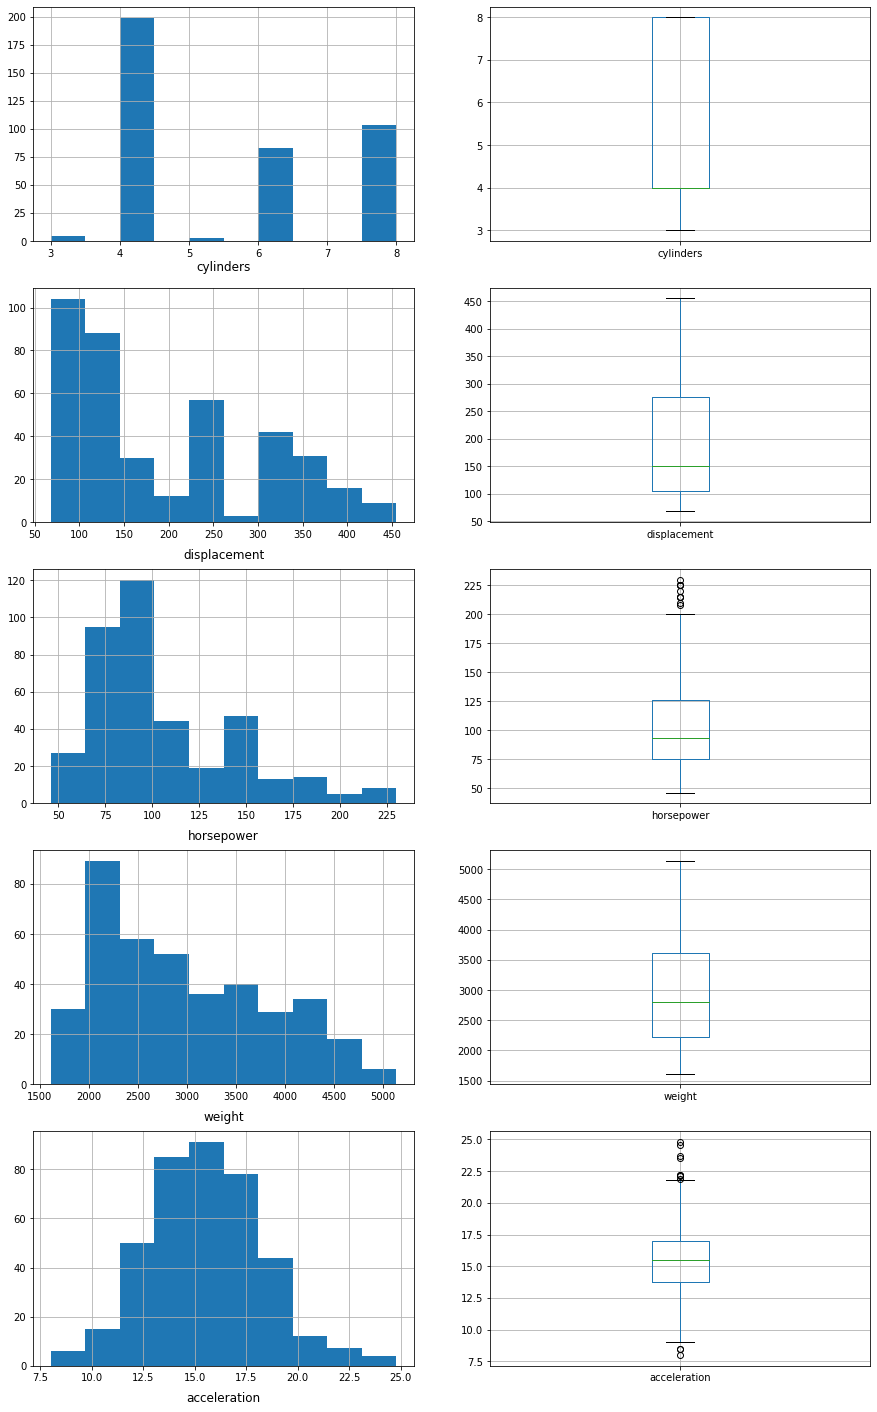

In [9]:
plt.subplot(5,2,1)
plt.title('cylinders', y=-0.15)
df['cylinders'].hist(figsize=(15, 25))

plt.subplot(5,2,2)
df.boxplot(column='cylinders')

plt.subplot(5,2,3)
plt.title('displacement', y=-0.18)
df['displacement'].hist()

plt.subplot(5,2,4)
df.boxplot(column='displacement')

plt.subplot(5,2,5)
plt.title('horsepower', y=-0.18)
df['horsepower'].hist()

plt.subplot(5,2,6)
df.boxplot(column='horsepower')

plt.subplot(5,2,7)
plt.title('weight', y=-0.18)
df['weight'].hist()

plt.subplot(5,2,8)
df.boxplot(column='weight')

plt.subplot(5,2,9)
plt.title('acceleration', y=-0.18)
df['acceleration'].hist()

plt.subplot(5,2,10)
df.boxplot(column='acceleration')

In [10]:
df[df.cylinders == 3]

,cylinders,displacement,horsepower,weight,acceleration,mpg
71,3,70.0,97.0,2330.0,13.5,19.0
111,3,70.0,90.0,2124.0,13.5,18.0
243,3,80.0,110.0,2720.0,13.5,21.5
334,3,70.0,100.0,2420.0,12.5,23.7


In [11]:
df[df.cylinders == 5]

,cylinders,displacement,horsepower,weight,acceleration,mpg
274,5,131.0,103.0,2830.0,15.9,20.3
297,5,183.0,77.0,3530.0,20.1,25.4
327,5,121.0,67.0,2950.0,19.9,36.4


- From univariate analysis, we can find that:
  - There are only 4 records have 3 cylinders & 3 records have 5 cylinders.
  - The cars which have 3 cylinders have low values of displacement, weight & acceleration.
  - The cars which have 3 or 5 cylinders have medium range of mpg.
  - 'Displacement' & 'horsepower' are highly skewed.
  - 'acceleration' has normal distribution.

# Bivariate Analysis¶

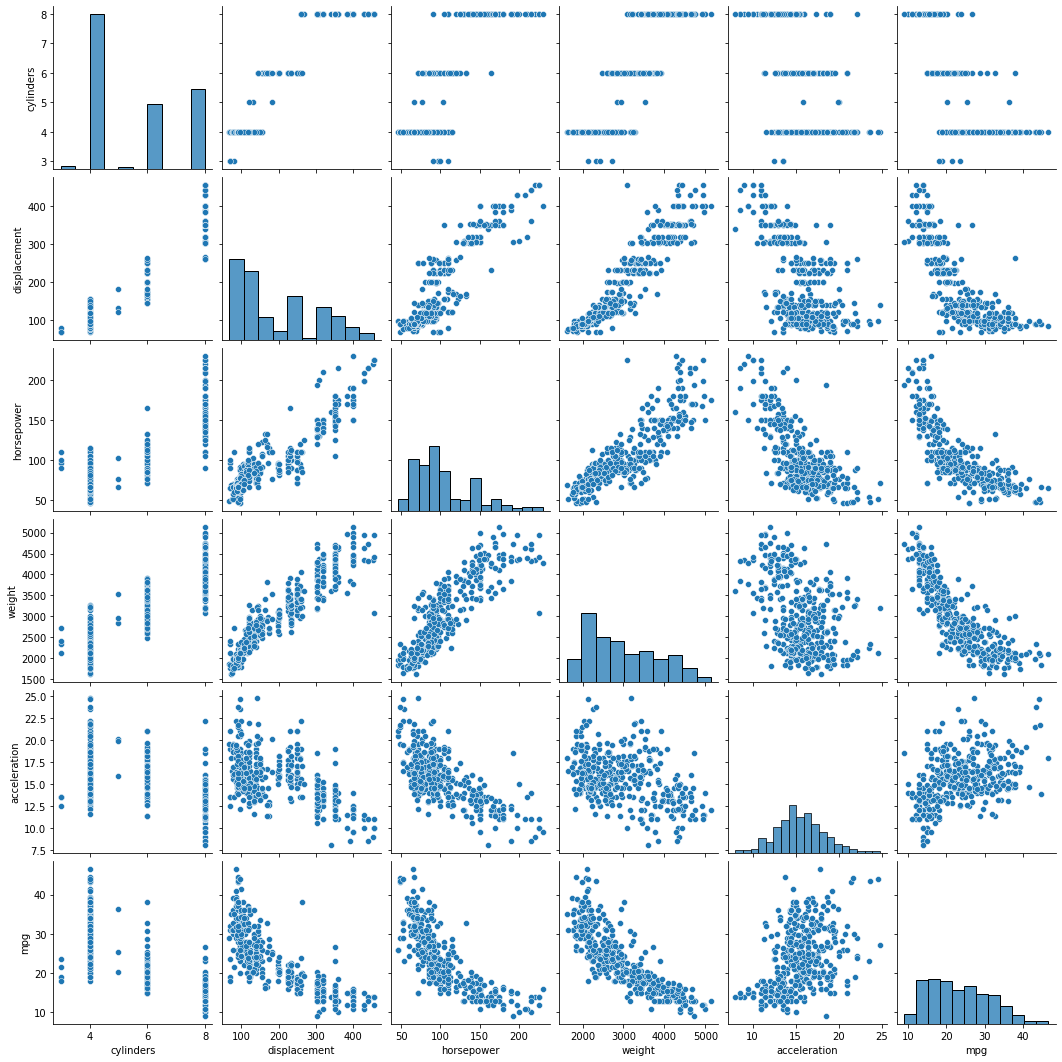

In [12]:
sns.pairplot(df)
plt.show()

- There is direct relation between displacement, weight & horsepower.

- There is inverse relation between horsepower Vs acceleration. 

In [13]:
def mpg_ranges(x):
    if x < 17:
        return 'low'
    elif 17 <= x < 29:
        return 'medium'
    else :
        return 'high'

In [14]:
df['mpg_ranges'] = df['mpg'].apply(lambda x: mpg_ranges(x))

<AxesSubplot:xlabel='displacement', ylabel='weight'>

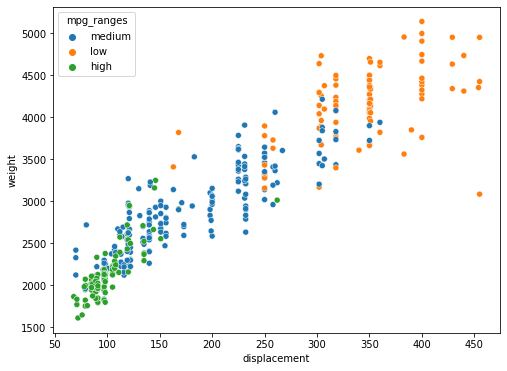

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(df['displacement'], df['weight'],hue=df['mpg_ranges'] )

<AxesSubplot:xlabel='displacement', ylabel='horsepower'>

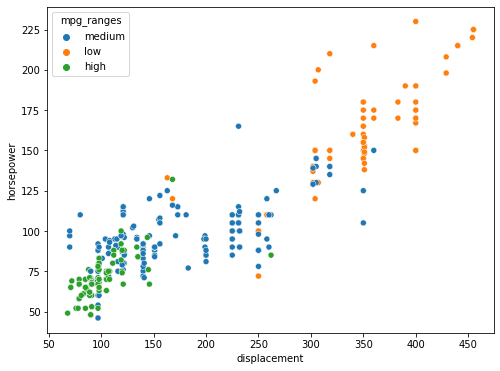

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(df['displacement'], df['horsepower'],hue=df['mpg_ranges'] )

<AxesSubplot:xlabel='horsepower', ylabel='acceleration'>

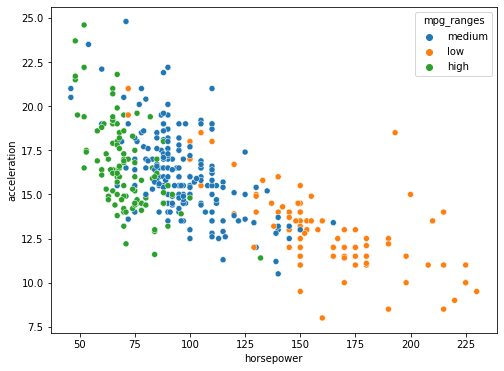

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(df['horsepower'], df['acceleration'],hue=df['mpg_ranges'] )

- From bivariate analysis, we can find that:
  - There is a direct relation between acceleration and mpg_ranges.
  - There is an inverse relation between horsepower, weight and displacement Vs mpg_ranges.